# Projeto Covid - Situação Brasil
## Por: Michel Souza Santana
> Data: 23/01/2023

### Objetivos
* Requisitar de um sites on-line via url dados sobre a covid19, vacinação, população, estados mais afetados, casos x mortes, etc.
* Armazenar os dados capturados em uma tabela.
* Organizar e limpar os dados.
* Anlisar os dados e selecionar os mais relevantes para o projeto.

### Análise dos dados
* Letalidade
* Taxa de mortalidade
* Índice de vacinação
* Casos X Mortes X Vacinação
* estados mais afetados
* População total

## Questão de Negócio
> Com base na ánálise verificar a contribuição das vacinas no resultado geeral de casos x mortes.

## Entendimento do Negócio
> ...

## Carregamento das bibliotecas Python

In [359]:
import pandas as pd
import numpy as np
from urllib.request import urlopen
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Coleta de Dados & Limpeza dos Dados
> (Casos x Morte): https://news.google.com/covid19/map?hl=pt-BR&mid=%2Fm%2F015fr&gl=BR&ceid=BR%3Apt-419 (Dados atualizados em: 21/01/2023)

> (Vacinação): https://especiais.g1.globo.com/bemestar/vacina/2021/mapa-brasil-vacina-covid/ (Dados atualizado em: 23/01/2023)

### Coletando dados de casos x mortes

In [360]:
html = urlopen('https://news.google.com/covid19/map?hl=pt-BR&mid=%2Fm%2F015fr&gl=BR&ceid=BR%3Apt-419')
bs = BeautifulSoup(html.read(), 'html.parser')
dados = bs.findAll('tr', {'class': 'sgXwHf wdLSAe YvL7re'})
dados[:2]

[<tr class="sgXwHf wdLSAe YvL7re" data-id="/m/01hd58" jsaction="click:KoQL8" jslog="110764; track:click"><th class="l3HOY" role="rowheader" scope="row"><div class="TWa0lb"><div class="ggJ3df" jsaction="JIbuQc:ROTNpb" jslog="113725; track:click"><button aria-label="Liberada" class="VfPpkd-Bz112c-LgbsSe yHy1rc eT1oJ mN1ivc Vs1w5b" data-disable-idom="true" data-n-mid="/m/01hd58" jsaction="click:cOuCgd; mousedown:UX7yZ; mouseup:lbsD7e; mouseenter:tfO1Yc; mouseleave:JywGue; touchstart:p6p2H; touchmove:FwuNnf; touchend:yfqBxc; touchcancel:JMtRjd; focus:AHmuwe; blur:O22p3e; contextmenu:mg9Pef;mlnRJb:fLiPzd;" jscontroller="soHxf"><div class="VfPpkd-Bz112c-Jh9lGc" jsname="s3Eaab"></div><div class="VfPpkd-Bz112c-J1Ukfc-LhBDec"></div><span aria-hidden="true" class="VfPpkd-kBDsod gsIK3e"><svg class="Xa3RBb NMm5M" focusable="false" height="16" viewbox="0 0 24 24" width="16"><path d="M0 0h24v24H0z" fill="none" stroke="#000" stroke-opacity=".008" stroke-width="0"></path><path d="M17 4v7l2 3v2h-6v5l-1

> Criando DataFrame (Casos x Mortes)

In [361]:
new_data = []
for d in dados:
    data = []
    td = []
    data.append(d.find('div', {'class': 'pcAJd'}).get_text())
    td = d.findAll('td', {'class': 'l3HOY'})
    data.append(td[0].get_text())
    data.append(td[1].get_text())
    data.append(td[3].get_text())
    data.append(td[4].get_text())
    new_data.append(data)
new_data[:5]

[['São Paulo', '6.389.460', '0', '145.099', '178.178'],
 ['Minas Gerais', '4.122.029', '0', '197.518', '64.799'],
 ['Rio Grande do Sul', '2.940.791', '0', '260.558', '41.716'],
 ['Paraná', '2.904.979', '179', '262.142', '45.929'],
 ['Rio de Janeiro', '2.719.059', '0', '165.180', '76.636']]

In [362]:
df_casos = pd.DataFrame(new_data)
df_casos.head()

,0,1,2,3,4
0,São Paulo,6.389.460,0,145.099,178.178
1,Minas Gerais,4.122.029,0,197.518,64.799
2,Rio Grande do Sul,2.940.791,0,260.558,41.716
3,Paraná,2.904.979,179,262.142,45.929
4,Rio de Janeiro,2.719.059,0,165.180,76.636


In [363]:
df_casos = pd.DataFrame(new_data, columns=['local', 'total_casos', 'novos_por_dia', 'a_cada_milhao', 'total_mortes' ])
df_casos.head()

,local,total_casos,novos_por_dia,a_cada_milhao,total_mortes
0,São Paulo,6.389.460,0,145.099,178.178
1,Minas Gerais,4.122.029,0,197.518,64.799
2,Rio Grande do Sul,2.940.791,0,260.558,41.716
3,Paraná,2.904.979,179,262.142,45.929
4,Rio de Janeiro,2.719.059,0,165.180,76.636


In [364]:
df_casos['total_casos'] = df_casos['total_casos'].str.replace('.', '')
df_casos['a_cada_milhao'] = df_casos['a_cada_milhao'].str.replace('.', '')
df_casos['a_cada_milhao'] = df_casos['a_cada_milhao'].str.replace('Não há dados', '0')
df_casos['total_mortes'] = df_casos['total_mortes'].str.replace('.', '')

/tmp/ipykernel_1028820/1065707230.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/tmp/ipykernel_1028820/1065707230.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/tmp/ipykernel_1028820/1065707230.py:4: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [365]:
df_casos['total_casos'] = df_casos['total_casos'].astype('int64')
df_casos['a_cada_milhao'] = df_casos['a_cada_milhao'].astype('int64')
df_casos['total_mortes'] = df_casos['total_mortes'].astype('int64')

In [366]:
df_casos.to_csv('csv/casosXmortes.csv')

### Coletando dados das vascinas

> Devido à dificuldade de interação sobre os dados via url, copiei manualmente o html da página e extrair os dados necessários.

In [367]:
html = pd.read_html('html_vacinacao.html')
df_vacinas = pd.DataFrame(html[0])
df_vacinas.head()

,Estado,2ª doseou doseúnica(Unidades),2ª doseou doseúnica(Em %),Dose dereforço*(Unidades),Dose dereforço*(Em %),1ª dose(Unidade),1ª dose(Em %),Total devacinasaplicadas
0,Acre,597.935,"65,05%",284.813,"30,99%",696.619,"75,79%",1.280.931
1,Alagoas,2.355.718,"69,73%",1.272.731,"37,67%",2.642.076,"78,21%",4.941.707
2,Amazonas,2.922.899,"67,48%",1.691.944,"39,06%",3.361.647,"77,61%",6.209.127
3,Amapá,514.824,"57,63%",269.240,"30,14%",614.022,"68,74%",1.111.564
4,Bahia,11.226.993,"74,66%",7.710.188,"51,28%",11.717.323,"77,93%",22.679.938


In [368]:
df_vacinas['2ª doseou doseúnica(Unidades)'] = df_vacinas['2ª doseou doseúnica(Unidades)'].str.replace('.', '')
df_vacinas['2ª doseou doseúnica(Unidades)'] = df_vacinas['2ª doseou doseúnica(Unidades)'].astype('int64')
df_vacinas['2ª doseou doseúnica(Em %)'] = df_vacinas['2ª doseou doseúnica(Em %)'].str.replace(',', '.')
df_vacinas['2ª doseou doseúnica(Em %)'] = df_vacinas['2ª doseou doseúnica(Em %)'].str.replace('%', '')
df_vacinas['2ª doseou doseúnica(Em %)'] = df_vacinas['2ª doseou doseúnica(Em %)'].astype(float)
df_vacinas['Dose dereforço*(Unidades)'] = df_vacinas['Dose dereforço*(Unidades)'].str.replace('.', '')
df_vacinas['Dose dereforço*(Unidades)'] = df_vacinas['Dose dereforço*(Unidades)'].astype('int64')
df_vacinas['Dose dereforço*(Em %)'] = df_vacinas['Dose dereforço*(Em %)'].str.replace(',', '.')
df_vacinas['Dose dereforço*(Em %)'] = df_vacinas['Dose dereforço*(Em %)'].str.replace('%', '')
df_vacinas['Dose dereforço*(Em %)'] = df_vacinas['Dose dereforço*(Em %)'].astype(float)
df_vacinas['1ª dose(Unidade)'] = df_vacinas['1ª dose(Unidade)'].str.replace('.', '')
df_vacinas['1ª dose(Unidade)'] = df_vacinas['1ª dose(Unidade)'].astype('int64')
df_vacinas['1ª dose(Em %)'] = df_vacinas['1ª dose(Em %)'].str.replace(',', '.')
df_vacinas['1ª dose(Em %)'] = df_vacinas['1ª dose(Em %)'].str.replace('%', '')
df_vacinas['1ª dose(Em %)'] = df_vacinas['1ª dose(Em %)'].astype(float)
df_vacinas['Total devacinasaplicadas'] = df_vacinas['Total devacinasaplicadas'].str.replace('.', '')
df_vacinas['Total devacinasaplicadas'] = df_vacinas['Total devacinasaplicadas'].astype('int64')

/tmp/ipykernel_1028820/3013469470.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/tmp/ipykernel_1028820/3013469470.py:6: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/tmp/ipykernel_1028820/3013469470.py:11: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/tmp/ipykernel_1028820/3013469470.py:16: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [369]:
df_vacinas = df_vacinas.rename(columns={'Estado': 'estado', 
                   '2ª doseou doseúnica(Unidades)': '2ª dose', 
                   '2ª doseou doseúnica(Unidades)': '2ª dose',
                   '2ª doseou doseúnica(Em %)': '2ª dose %',
                   'Dose dereforço*(Unidades)': 'reforco',
                   'Dose dereforço*(Em %)': 'reforco %',
                   '1ª dose(Unidade)': '1ª dose',
                   '1ª dose(Em %)': '1ª dose %',
                   'Total devacinasaplicadas': 'total vascinas'
                   }) 

In [370]:
df_vacinas.head()

,estado,2ª dose,2ª dose %,reforco,reforco %,1ª dose,1ª dose %,total vascinas
0,Acre,597935,65.05,284813,30.99,696619,75.79,1280931
1,Alagoas,2355718,69.73,1272731,37.67,2642076,78.21,4941707
2,Amazonas,2922899,67.48,1691944,39.06,3361647,77.61,6209127
3,Amapá,514824,57.63,269240,30.14,614022,68.74,1111564
4,Bahia,11226993,74.66,7710188,51.28,11717323,77.93,22679938


In [371]:
df_vacinas.to_csv('csv/vascinas.csv')

### Coletando dados da população

In [372]:
html = urlopen('https://www.amunes.org.br/noticia/ler/173/ibge-divulga-nova-estimativa-populacional-dos-estados-e-municipios')
bs = BeautifulSoup(html.read(), 'html.parser')
populacao = bs.findAll('tr')

In [373]:
tabela = []
for t in range(len(populacao)):
    tabela.append(populacao[t])

In [374]:
df_populacao = pd.DataFrame(tabela)
df_populacao.drop(index=([0, 1]), inplace=True)
df_populacao = df_populacao.reset_index()
df_populacao.drop(columns=['index'], inplace=True)

/usr/lib/python3/dist-packages/pandas/core/internals/construction.py:540: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



In [375]:
for i in range(len(df_populacao[0])):
    df_populacao[0][i] = df_populacao[0][i].get_text()
    df_populacao[1][i] = df_populacao[1][i].get_text()
df_populacao.head()

,0,1
0,São Paulo,43.663.672
1,Minas Gerais,20.593.366
2,Rio de Janeiro,16.369.178
3,Espírito Santo,3.839.363
4,Região Nordeste,


In [376]:
df_populacao[1] = df_populacao[1].str.replace('.', '')
df_populacao = df_populacao.fillna(0)
df_populacao.head()

/tmp/ipykernel_1028820/1068304898.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,0,1
0,São Paulo,43663672
1,Minas Gerais,20593366
2,Rio de Janeiro,16369178
3,Espírito Santo,3839363
4,Região Nordeste,


In [377]:
for i in range(len(df_populacao[0])):
    if df_populacao[1][i] == '' or df_populacao[1][i] == ' ':
        df_populacao[1][i] = 0

In [378]:
df_populacao[1] = df_populacao[1].astype('int64')
df_populacao.head()

,0,1
0,São Paulo,43663672
1,Minas Gerais,20593366
2,Rio de Janeiro,16369178
3,Espírito Santo,3839363
4,Região Nordeste,0


In [379]:
df_populacao = df_populacao[df_populacao[1] != 0]
df_populacao.head()

,0,1
0,São Paulo,43663672
1,Minas Gerais,20593366
2,Rio de Janeiro,16369178
3,Espírito Santo,3839363
5,Bahia,15044127


In [380]:
df_populacao = df_populacao.reset_index()
df_populacao.drop(columns=['index'], inplace=True)
df_populacao = df_populacao.rename(columns={df_populacao.columns[0]:'estado'})
df_populacao = df_populacao.rename(columns={df_populacao.columns[1]:'populacao'})

df_populacao = df_populacao.sort_values(by=['estado'])
df_populacao = df_populacao.reset_index()
df_populacao.drop(columns=['index'], inplace=True)
df_populacao.head()

,estado,populacao
0,Acre,776463
1,Alagoas,3300938
2,Amapá,734995
3,Amazonas,3807923
4,Bahia,15044127


In [381]:
df_populacao.to_csv('csv/populacao.csv')

### Carregando todas as tabelas para merge

In [382]:
casos = pd.read_csv('csv/casosXmortes.csv')
vascinas = pd.read_csv('csv/vascinas.csv')
populacao = pd.read_csv('csv/populacao.csv')

In [383]:
populacao.head(1)

,Unnamed: 0,estado,populacao
0,0,Acre,776463


In [384]:
casos.head(1)

,Unnamed: 0,local,total_casos,novos_por_dia,a_cada_milhao,total_mortes
0,0,São Paulo,6389460,0,145099,178178


In [385]:
vascinas.head(1)

,Unnamed: 0,estado,2ª dose,2ª dose %,reforco,reforco %,1ª dose,1ª dose %,total vascinas
0,0,Acre,597935,65.05,284813,30.99,696619,75.79,1280931


In [386]:
df = populacao.merge(casos, left_on='estado', right_on='local')
df.head()

,Unnamed: 0_x,estado,populacao,Unnamed: 0_y,local,total_casos,novos_por_dia,a_cada_milhao,total_mortes
0,0,Acre,776463,26,Acre,160113,2,202649,2041
1,1,Alagoas,3300938,23,Alagoas,336822,11,101400,7230
2,2,Amapá,734995,24,Amapá,183667,0,244563,2167
3,3,Amazonas,3807923,15,Amazonas,625274,3,161413,14421
4,4,Bahia,15044127,7,Bahia,1783601,16,117908,31353


In [387]:
df.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'local'], inplace=True)

In [388]:
df = df.merge(vascinas, left_on='estado', right_on='estado')
df.head()

,estado,populacao,total_casos,novos_por_dia,a_cada_milhao,total_mortes,Unnamed: 0,2ª dose,2ª dose %,reforco,reforco %,1ª dose,1ª dose %,total vascinas
0,Acre,776463,160113,2,202649,2041,0,597935,65.05,284813,30.99,696619,75.79,1280931
1,Alagoas,3300938,336822,11,101400,7230,1,2355718,69.73,1272731,37.67,2642076,78.21,4941707
2,Amapá,734995,183667,0,244563,2167,3,514824,57.63,269240,30.14,614022,68.74,1111564
3,Amazonas,3807923,625274,3,161413,14421,2,2922899,67.48,1691944,39.06,3361647,77.61,6209127
4,Bahia,15044127,1783601,16,117908,31353,4,11226993,74.66,7710188,51.28,11717323,77.93,22679938


In [389]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,estado,populacao,total_casos,novos_por_dia,a_cada_milhao,total_mortes,2ª dose,2ª dose %,reforco,reforco %,1ª dose,1ª dose %,total vascinas
0,Acre,776463,160113,2,202649,2041,597935,65.05,284813,30.99,696619,75.79,1280931
1,Alagoas,3300938,336822,11,101400,7230,2355718,69.73,1272731,37.67,2642076,78.21,4941707
2,Amapá,734995,183667,0,244563,2167,514824,57.63,269240,30.14,614022,68.74,1111564
3,Amazonas,3807923,625274,3,161413,14421,2922899,67.48,1691944,39.06,3361647,77.61,6209127
4,Bahia,15044127,1783601,16,117908,31353,11226993,74.66,7710188,51.28,11717323,77.93,22679938


In [390]:
df.to_csv('csv/df_covid_full.csv')

## Exploração dos Dados
> ...

In [391]:
df = pd.read_csv('csv/df_covid_full.csv')
df.head()

,Unnamed: 0,estado,populacao,total_casos,novos_por_dia,a_cada_milhao,total_mortes,2ª dose,2ª dose %,reforco,reforco %,1ª dose,1ª dose %,total vascinas
0,0,Acre,776463,160113,2,202649,2041,597935,65.05,284813,30.99,696619,75.79,1280931
1,1,Alagoas,3300938,336822,11,101400,7230,2355718,69.73,1272731,37.67,2642076,78.21,4941707
2,2,Amapá,734995,183667,0,244563,2167,514824,57.63,269240,30.14,614022,68.74,1111564
3,3,Amazonas,3807923,625274,3,161413,14421,2922899,67.48,1691944,39.06,3361647,77.61,6209127
4,4,Bahia,15044127,1783601,16,117908,31353,11226993,74.66,7710188,51.28,11717323,77.93,22679938


In [392]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [393]:
df.shape

(27, 13)

In [394]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   estado          27 non-null     object 
 1   populacao       27 non-null     int64  
 2   total_casos     27 non-null     int64  
 3   novos_por_dia   27 non-null     int64  
 4   a_cada_milhao   27 non-null     int64  
 5   total_mortes    27 non-null     int64  
 6   2ª dose         27 non-null     int64  
 7   2ª dose %       27 non-null     float64
 8   reforco         27 non-null     int64  
 9   reforco %       27 non-null     float64
 10  1ª dose         27 non-null     int64  
 11  1ª dose %       27 non-null     float64
 12  total vascinas  27 non-null     int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 2.9+ KB


In [395]:
df.isnull().sum()

estado            0
populacao         0
total_casos       0
novos_por_dia     0
a_cada_milhao     0
total_mortes      0
2ª dose           0
2ª dose %         0
reforco           0
reforco %         0
1ª dose           0
1ª dose %         0
total vascinas    0
dtype: int64

In [396]:
df.isna().sum()

estado            0
populacao         0
total_casos       0
novos_por_dia     0
a_cada_milhao     0
total_mortes      0
2ª dose           0
2ª dose %         0
reforco           0
reforco %         0
1ª dose           0
1ª dose %         0
total vascinas    0
dtype: int64

In [397]:
df.head(1)

,estado,populacao,total_casos,novos_por_dia,a_cada_milhao,total_mortes,2ª dose,2ª dose %,reforco,reforco %,1ª dose,1ª dose %,total vascinas
0,Acre,776463,160113,2,202649,2041,597935,65.05,284813,30.99,696619,75.79,1280931


In [398]:
df['estado'].nunique()

27

In [399]:
df.describe()

,populacao,total_casos,novos_por_dia,a_cada_milhao,total_mortes,2ª dose,2ª dose %,reforco,reforco %,1ª dose,1ª dose %,total vascinas
count,2.700000e+01,2.700000e+01,27.000000,27.000000,27.000000,2.700000e+01,27.000000,2.700000e+01,27.000000,2.700000e+01,27.000000,2.700000e+01
mean,7.445656e+06,1.359928e+06,20.444444,194400.518519,25787.296296,6.402540e+06,74.587778,4.005109e+06,43.677037,6.763174e+06,81.102222,1.299957e+07
std,8.865548e+06,1.428339e+06,48.513546,84051.495754,35694.002474,8.294569e+06,9.188774,5.713347e+06,11.341412,8.543063e+06,6.492131,1.661247e+07
min,4.880720e+05,1.601130e+05,0.000000,0.000000,2041.000000,3.632790e+05,54.200000,1.400780e+05,20.900000,4.616320e+05,68.740000,8.125770e+05
25%,2.688514e+06,4.487605e+05,0.000000,138119.000000,7735.000000,2.296065e+06,67.835000,1.217002e+06,32.645000,2.415816e+06,77.565000,4.592874e+06
50%,3.839363e+06,8.645730e+05,0.000000,178462.000000,14421.000000,3.227524e+06,77.510000,1.970073e+06,46.440000,3.469351e+06,81.110000,6.585652e+06
75%,8.993563e+06,1.823943e+06,11.500000,261350.000000,27990.500000,8.033822e+06,81.015000,4.955648e+06,52.290000,8.411306e+06,85.480000,1.623270e+07
max,4.366367e+07,6.389460e+06,179.000000,365608.000000,178178.000000,4.192301e+07,89.200000,2.863198e+07,60.920000,4.310590e+07,94.770000,8.374280e+07


In [400]:
(df['a_cada_milhao'] == 0).sum()

1

In [401]:
df['a_cada_milhao'].replace(0, np.nan, inplace=True)
df.isnull().sum()

estado            0
populacao         0
total_casos       0
novos_por_dia     0
a_cada_milhao     1
total_mortes      0
2ª dose           0
2ª dose %         0
reforco           0
reforco %         0
1ª dose           0
1ª dose %         0
total vascinas    0
dtype: int64

In [402]:
df['a_cada_milhao'].fillna(value=df['a_cada_milhao'].mean(), inplace=True)
df.isnull().sum().sum()

0

In [403]:
df['a_cada_milhao'].replace(0, np.nan, inplace=True)
df.isnull().sum()

estado            0
populacao         0
total_casos       0
novos_por_dia     0
a_cada_milhao     0
total_mortes      0
2ª dose           0
2ª dose %         0
reforco           0
reforco %         0
1ª dose           0
1ª dose %         0
total vascinas    0
dtype: int64

In [404]:
df.head()

,estado,populacao,total_casos,novos_por_dia,a_cada_milhao,total_mortes,2ª dose,2ª dose %,reforco,reforco %,1ª dose,1ª dose %,total vascinas
0,Acre,776463,160113,2,202649.0,2041,597935,65.05,284813,30.99,696619,75.79,1280931
1,Alagoas,3300938,336822,11,101400.0,7230,2355718,69.73,1272731,37.67,2642076,78.21,4941707
2,Amapá,734995,183667,0,244563.0,2167,514824,57.63,269240,30.14,614022,68.74,1111564
3,Amazonas,3807923,625274,3,161413.0,14421,2922899,67.48,1691944,39.06,3361647,77.61,6209127
4,Bahia,15044127,1783601,16,117908.0,31353,11226993,74.66,7710188,51.28,11717323,77.93,22679938


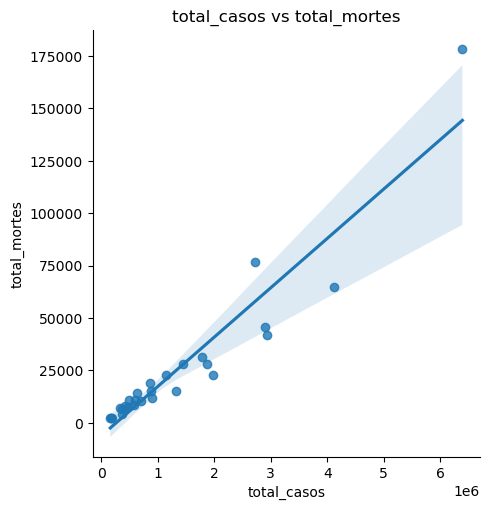

In [405]:
ax = sns.lmplot(data = df, x = 'total_casos', y = 'total_mortes')
ax.set(title = 'total_casos vs total_mortes')

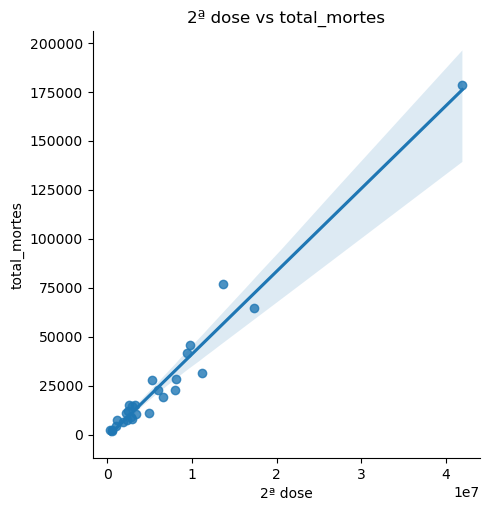

In [406]:
ax = sns.lmplot(data = df, x = '2ª dose', y = 'total_mortes')
ax.set(title = '2ª dose vs total_mortes')

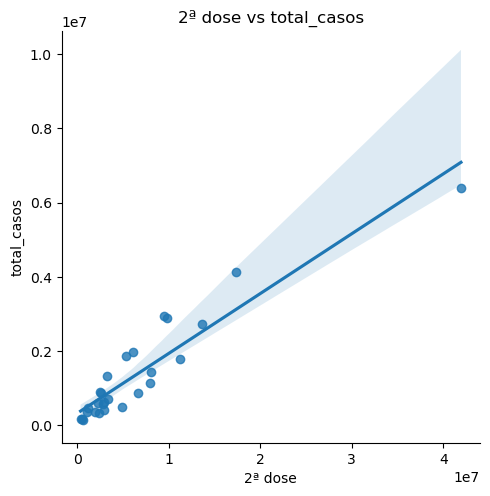

In [407]:
ax = sns.lmplot(data = df, x = '2ª dose', y = 'total_casos')
ax.set(title = '2ª dose vs total_casos')

/tmp/ipykernel_1028820/1019059574.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot:xlabel='total_casos', ylabel='Density'>

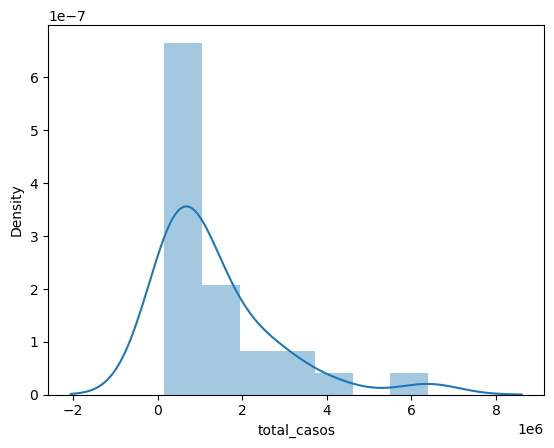

In [408]:
sns.distplot(df['total_casos'])

/tmp/ipykernel_1028820/234202714.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot:xlabel='total_mortes', ylabel='Density'>

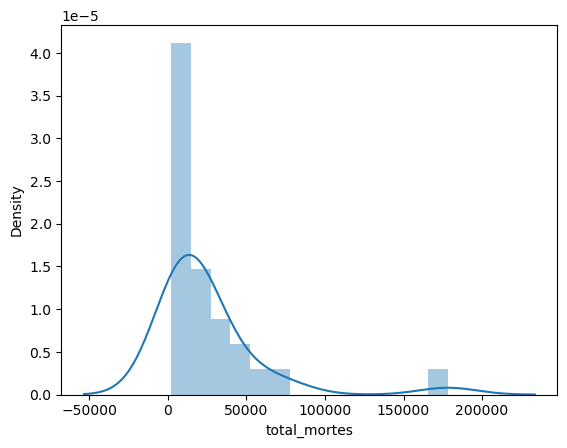

In [409]:
sns.distplot(df['total_mortes'])

In [412]:
df_corr = df.drop(columns=['novos_por_dia', 'a_cada_milhao', '2ª dose %', 'reforco %', '1ª dose %'])
df_corr.corr()

,populacao,total_casos,total_mortes,2ª dose,reforco,1ª dose,total vascinas
populacao,1.000000,0.938629,0.974508,0.996112,0.991382,0.997036,0.996897
total_casos,0.938629,1.000000,0.942987,0.935933,0.937133,0.936839,0.936830
total_mortes,0.974508,0.942987,1.000000,0.982849,0.981292,0.982816,0.982363
2ª dose,0.996112,0.935933,0.982849,1.000000,0.996624,0.999757,0.999875
reforco,0.991382,0.937133,0.981292,0.996624,1.000000,0.995766,0.996080
1ª dose,0.997036,0.936839,0.982816,0.999757,0.995766,1.000000,0.999949
total vascinas,0.996897,0.936830,0.982363,0.999875,0.996080,0.999949,1.000000


<AxesSubplot:>

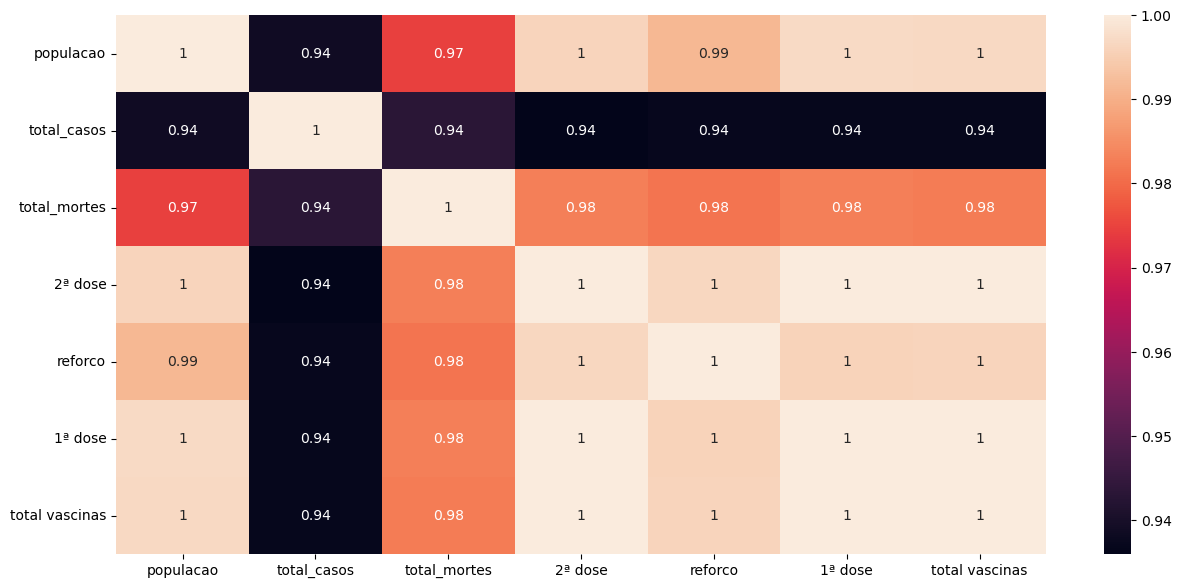

In [413]:
plt.figure(figsize = (15, 7))
sns.heatmap(df_corr.corr(), annot = True)

## Modelagem dos Dados
> ...

## Algoritmos de Machine Laearning
> ...

## Avaliação do algoritimo
> ...

## Storytelling
> ...